#  Credit Card Fraud Detection

This is a machine learning project that aims to detect fraudulent credit card transactions using a dataset of anonymized credit card transactions. The project uses supervised learning techniques, specifically Logistic Regression, Decision Tree, and Random Forest classifiers, to train classification models that can predict whether a given credit card transaction is fraudulent or not.

In [1]:
# Importing the libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score 
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the data
df = pd.read_csv('creditcard_data.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# shape of dataset
print('Number of Rows', df.shape)
print('Number of Columns', df.shape)

Number of Rows (284806, 31)
Number of Columns (284806, 31)


In [4]:
# information of total rows, columns, datatypes and memory requirements
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284806 entries, 0 to 284805
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284806 non-null  float64
 1   V1      284806 non-null  float64
 2   V2      284806 non-null  float64
 3   V3      284806 non-null  float64
 4   V4      284806 non-null  float64
 5   V5      284806 non-null  float64
 6   V6      284806 non-null  float64
 7   V7      284806 non-null  float64
 8   V8      284806 non-null  float64
 9   V9      284806 non-null  float64
 10  V10     284806 non-null  float64
 11  V11     284806 non-null  float64
 12  V12     284806 non-null  float64
 13  V13     284806 non-null  float64
 14  V14     284806 non-null  float64
 15  V15     284806 non-null  float64
 16  V16     284806 non-null  float64
 17  V17     284806 non-null  float64
 18  V18     284806 non-null  float64
 19  V19     284806 non-null  float64
 20  V20     284806 non-null  float64
 21  V21     28

In [5]:
# check null values 
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
# Checking distribution of numerical values in the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,284806.000000,284806.000000,...,2.848060e+05,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,2.848060e+05,2.848060e+05,284806.000000,284806.000000
mean,94813.585781,0.000002,6.661837e-07,-0.000002,0.000002,4.405008e-08,0.000002,-0.000006,0.000001,-0.000002,...,-9.166149e-07,-0.000002,-0.000001,-3.088756e-08,0.000002,0.000003,8.483873e-09,-4.792707e-08,88.349168,0.001727
std,47488.004530,1.958699,1.651311e+00,1.516257,1.415871,1.380249e+00,1.332273,1.237092,1.194355,1.098634,...,7.345251e-01,0.725702,0.624461,6.056481e-01,0.521278,0.482225,4.036332e-01,3.300838e-01,250.120432,0.041527
min,0.000000,-56.407510,-7.271573e+01,-48.325589,-5.683171,-1.137433e+02,-26.160506,-43.557242,-73.216718,-13.434066,...,-3.483038e+01,-10.933144,-44.807735,-2.836627e+00,-10.295397,-2.604551,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.250000,-0.920374,-5.985522e-01,-0.890368,-0.848642,-6.915995e-01,-0.768296,-0.554080,-0.208628,-0.643098,...,-2.283974e-01,-0.542351,-0.161846,-3.545895e-01,-0.317142,-0.326979,-7.083961e-02,-5.295995e-02,5.600000,0.000000
50%,84691.500000,0.018109,6.549621e-02,0.179846,-0.019845,-5.433621e-02,-0.274186,0.040097,0.022358,-0.051429,...,-2.945020e-02,0.006781,-0.011196,4.097671e-02,0.016596,-0.052134,1.342244e-03,1.124381e-02,22.000000,0.000000
75%,139320.000000,1.315645,8.037257e-01,1.027198,0.743348,6.119267e-01,0.398567,0.570426,0.327346,0.597140,...,1.863701e-01,0.528548,0.147641,4.395270e-01,0.350716,0.240955,9.104579e-02,7.828043e-02,77.160000,0.000000
max,172788.000000,2.454930,2.205773e+01,9.382558,16.875344,3.480167e+01,73.301626,120.589494,20.007208,15.594995,...,2.720284e+01,10.503090,22.528412,4.584549e+00,7.519589,3.517346,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# Checking the correlation
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173984e-01,-1.059272e-02,-4.196230e-01,-1.052587e-01,1.730730e-01,-6.301398e-02,8.470767e-02,-3.694762e-02,-8.663029e-03,...,4.473390e-02,1.440548e-01,5.113916e-02,-1.618203e-02,-2.330790e-01,-4.139772e-02,-5.134581e-03,-9.412971e-03,-0.010599,-0.012322
V1,0.117398,1.000000e+00,-1.098624e-07,4.435455e-07,-3.419080e-07,-8.694801e-09,-4.662443e-07,1.218935e-06,-3.319674e-07,4.231489e-07,...,3.398400e-07,8.473373e-07,5.769342e-07,1.388833e-08,-8.688316e-07,-1.622534e-06,-5.714209e-09,3.953780e-08,-0.227708,-0.101347
V2,-0.010593,-1.098624e-07,1.000000e+00,1.871392e-07,-1.442564e-07,-3.668784e-09,-1.967118e-07,5.142857e-07,-1.400610e-07,1.785308e-07,...,1.433853e-07,3.574983e-07,2.434103e-07,5.860695e-09,-3.665696e-07,-6.845636e-07,-2.415081e-09,1.668431e-08,-0.531409,0.091289
V3,-0.419623,4.435455e-07,1.871392e-07,1.000000e+00,5.823775e-07,1.480005e-08,7.941612e-07,-2.076230e-06,5.654478e-07,-7.207571e-07,...,-5.788599e-07,-1.443281e-06,-9.827024e-07,-2.365457e-08,1.479898e-06,2.763690e-06,9.741052e-09,-6.734186e-08,-0.210881,-0.192961
V4,-0.105259,-3.419080e-07,-1.442564e-07,5.823775e-07,1.000000e+00,-1.141195e-08,-6.121767e-07,1.600461e-06,-4.358746e-07,5.555930e-07,...,4.462109e-07,1.112550e-06,7.575133e-07,1.823434e-08,-1.140774e-06,-2.130388e-06,-7.514214e-09,5.191151e-08,0.098732,0.133447
V5,0.173073,-8.694801e-09,-3.668784e-09,1.480005e-08,-1.141195e-08,1.000000e+00,-1.556168e-08,4.069958e-08,-1.108203e-08,1.412224e-08,...,1.134104e-08,2.828181e-08,1.925978e-08,4.632979e-10,-2.899717e-08,-5.415482e-08,-1.930995e-10,1.329769e-09,-0.386356,-0.094974
V6,-0.063014,-4.662443e-07,-1.967118e-07,7.941612e-07,-6.121767e-07,-1.556168e-08,1.000000e+00,2.182472e-06,-5.943839e-07,7.576399e-07,...,6.084826e-07,1.517132e-06,1.032991e-06,2.487012e-08,-1.555627e-06,-2.905109e-06,-1.024332e-08,7.079262e-08,0.215982,-0.043643
V7,0.084708,1.218935e-06,5.142857e-07,-2.076230e-06,1.600461e-06,4.069958e-08,2.182472e-06,1.000000e+00,1.553945e-06,-1.980746e-06,...,-1.590793e-06,-3.966350e-06,-2.700630e-06,-6.501824e-08,4.066979e-06,7.595039e-06,2.677044e-08,-1.850795e-07,0.397310,-0.187257
V8,-0.036948,-3.319674e-07,-1.400610e-07,5.654478e-07,-4.358746e-07,-1.108203e-08,-5.943839e-07,1.553945e-06,1.000000e+00,5.394418e-07,...,4.332393e-07,1.080208e-06,7.354993e-07,1.770554e-08,-1.107620e-06,-2.068462e-06,-7.297882e-09,5.040720e-08,-0.103079,0.019875
V9,-0.008663,4.231489e-07,1.785308e-07,-7.207571e-07,5.555930e-07,1.412224e-08,7.576399e-07,-1.980746e-06,5.394418e-07,1.000000e+00,...,-5.522357e-07,-1.376904e-06,-9.375128e-07,-2.256909e-08,1.411835e-06,2.636590e-06,9.300299e-09,-6.425117e-08,-0.044246,-0.097733


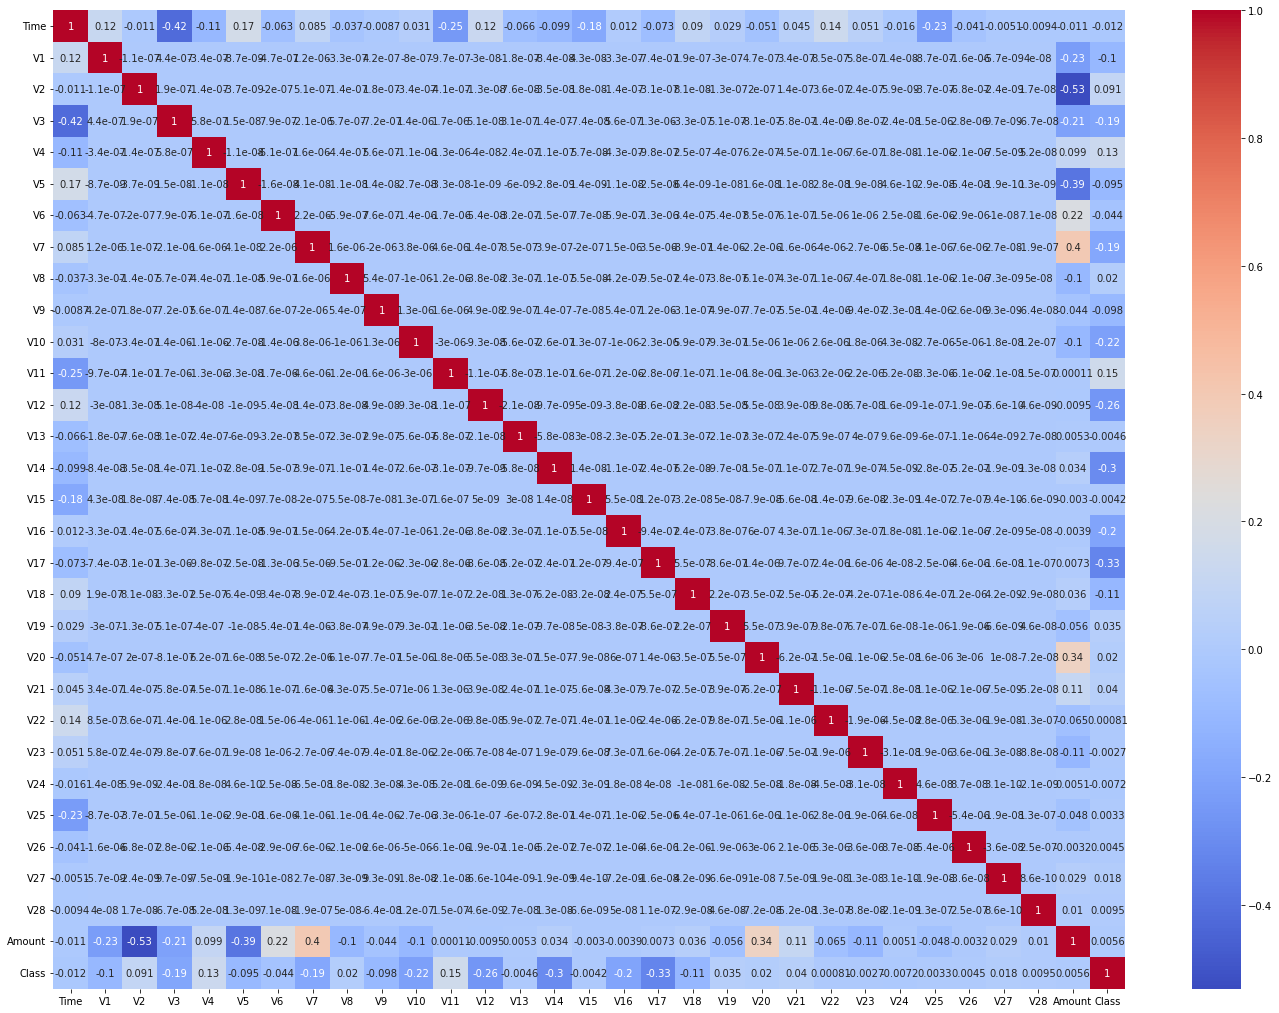

In [8]:
# Checking the correlation in heatmap
plt.figure(figsize=(24,18))

sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.show()

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

NameError: name 'X' is not defined

In [ ]:
# Accumulating all the column names under one variable
cols = list(X.columns.values)

In [ ]:
# plot the histogram of a variable from the dataset to see the skewness
normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][normal_records], color='green')
  sns.distplot(X[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

# Feature Scaling

In [ ]:
sc=StandardScaler()
df['Amount']=sc.fit_transform(pd.DataFrame(df['Amount']))

In [ ]:
df.head()

In [ ]:
df=df.drop(['Time'],axis=1)

In [ ]:
df.head()

In [ ]:
# drop duplicate if any

df.duplicated().any()

In [ ]:
df=df.drop_duplicates()
df.shape

In [ ]:
# checking imbalance
df['Class'].value_counts()

In [ ]:
sns.countplot(df['Class'])

In [16]:
# Splitting Dataset for training and testing

X= df.drop('Class', axis=1)
y= df['Class']

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

In [18]:
# Undersampling

Normal = df[df['Class']==0]
Fraud = df[df['Class']==1]
print(Normal.shape)
print(Fraud.shape)


(284314, 31)
(492, 31)


In [19]:
Normalsample=Normal.sample(n=473)
print(Normalsample.shape)

(473, 31)


In [20]:
df_new=pd.concat([Normalsample, Fraud], ignore_index=True)

In [21]:
df_new['Class'].value_counts()

1    492
0    473
Name: Class, dtype: int64

In [22]:
X = df_new.drop('Class',axis=1)
y = df_new['Class']

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

In [24]:
# Logistic Regression

log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [25]:
y_pred1 = log.predict(X_test)

In [26]:
accuracy_score(y_test,y_pred1)

0.927461139896373

In [27]:
precision_score(y_test,y_pred1)

0.968421052631579

In [28]:
recall_score(y_test,y_pred1)

0.8932038834951457

In [29]:
f1_score(y_test,y_pred1)

0.9292929292929294

In [31]:
# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [32]:
y_pred2 = dt.predict(X_test)

In [33]:
accuracy_score(y_test,y_pred2)

0.8860103626943006

In [34]:
precision_score(y_test,y_pred2)

0.900990099009901

In [35]:
recall_score(y_test,y_pred2)

0.883495145631068

In [36]:
f1_score(y_test,y_pred2)

0.8921568627450982

In [37]:
# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [38]:
y_pred3 = rf.predict(X_test)

In [39]:
accuracy_score(y_test,y_pred3)

0.9119170984455959

In [40]:
precision_score(y_test,y_pred3)

0.967391304347826

In [41]:
recall_score(y_test,y_pred3)

0.8640776699029126

In [42]:
f1_score(y_test,y_pred3)

0.9128205128205128

In [43]:
df_new1 = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})

In [44]:
df_new1

,Models,ACC
0,LR,92.746114
1,DT,88.601036
2,RF,91.191710


<AxesSubplot: xlabel='Models', ylabel='ACC'>

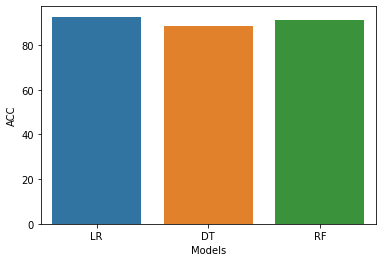

In [45]:
#plot barplots
sns.barplot(df_new1['Models'],df_new1['ACC'])

# Oversampling

In [46]:
df.shape

(284806, 31)

In [47]:
X = df.drop('Class',axis=1)
y = df['Class']

In [48]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [ ]:
y_res.value_counts()

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,
                                                 random_state=42)

# Classification report, confusion matrix and accuracy report

In [83]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

### Logistic Regression Classifier

In [85]:
test_score = accuracy_score(y_test, log_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, log_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,96.688957,96.639291


### Decision Tree Classifier

In [86]:
Dt_clf = DecisionTreeClassifier(random_state=42)
Dt_clf.fit(X_train, y_train)

print_score(Dt_clf, X_train, y_train, X_test, y_test, train=True)
print_score(Dt_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                  0         1  accuracy  macro avg  weighted avg
precision       1.0       1.0       1.0        1.0           1.0
recall          1.0       1.0       1.0        1.0           1.0
f1-score        1.0       1.0       1.0        1.0           1.0
support    227520.0  227382.0       1.0   454902.0      454902.0
_______________________________________________
Confusion Matrix: 
 [[227520      0]
 [     0 227382]]

Test Result:
Accuracy Score: 99.86%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy      macro avg   weighted avg
precision      0.999348      0.997878  0.998611       0.998613       0.998612
recall         0.997869      0.999350  0.998611       0.998610       0.998611
f1-score       0.998608      0.998613  0.998611       0.998611       0.998611
support    56794.000000  56932.000000  0.99

In [87]:
test_score = accuracy_score(y_test, Dt_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, Dt_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,96.688957,96.639291
1,Decision Tree Classifier,100.000000,99.861070


### Random Forest Classifier

In [88]:
Rf_clf = RandomForestClassifier(n_estimators=10, random_state=42)
Rf_clf.fit(X_train, y_train)

print_score(Rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(Rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                       0              1  accuracy      macro avg  \
precision       1.000000       0.999982  0.999991       0.999991   
recall          0.999982       1.000000  0.999991       0.999991   
f1-score        0.999991       0.999991  0.999991       0.999991   
support    227520.000000  227382.000000  0.999991  454902.000000   

            weighted avg  
precision       0.999991  
recall          0.999991  
f1-score        0.999991  
support    454902.000000  
_______________________________________________
Confusion Matrix: 
 [[227516      4]
 [     0 227382]]

Test Result:
Accuracy Score: 99.99%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy      macro avg   weighted avg
precision      1.000000      0.999807  0.999903       0.999903       0.999903
recall         0.999806      1.000000  0.999903 

In [89]:
test_score = accuracy_score(y_test, Rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, Rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,96.688957,96.639291
1,Decision Tree Classifier,100.000000,99.861070
2,Random Forest Classifier,99.999121,99.990328


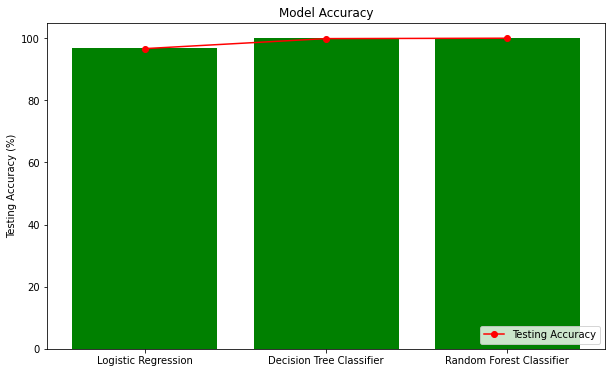

In [90]:
# Create a list of models, training accuracy, and testing accuracy
models = ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier']
train_acc = [96.688957, 100.000000, 99.999121]
test_acc = [96.639291, 99.861070, 99.990328]

# Set the size of the chart
plt.figure(figsize=(10, 6))

# Plot the bar chart for training accuracy
plt.bar(models, train_acc, color='green')
plt.ylabel('Training Accuracy (%)')

# Plot the line chart for testing accuracy
plt.plot(models, test_acc, color='red', marker='o')
plt.ylabel('Testing Accuracy (%)')

# Add legend and title
plt.legend(['Testing Accuracy'], loc='lower right')
plt.title('Model Accuracy')

# Display the chart
plt.show()


In [51]:
# Logistic Regression

log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [52]:
y_pred1 = log.predict(X_test)

In [53]:
accuracy_score(y_test,y_pred1)

0.9729173627842358

In [54]:
precision_score(y_test,y_pred1)

0.9795198746260151

In [55]:
recall_score(y_test,y_pred1)

0.9660999086629664

In [56]:
f1_score(y_test,y_pred1)

0.9727636093523399

In [57]:
# Decision Tree Classifier

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [58]:
y_pred2 = dt.predict(X_test)

In [59]:
accuracy_score(y_test,y_pred2)

0.9985403513708386

In [60]:
precision_score(y_test,y_pred2)

0.9978250955905567

In [61]:
recall_score(y_test,y_pred2)

0.9992622778051008

In [62]:
f1_score(y_test,y_pred2)

0.9985431695715513

In [63]:
# Random Forest Classifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [64]:
y_pred3 = rf.predict(X_test)

In [65]:
accuracy_score(y_test,y_pred3)

0.9999208624237201

In [66]:
precision_score(y_test,y_pred3)

0.99984194165891

In [67]:
recall_score(y_test,y_pred3)

1.0

In [68]:
f1_score(y_test,y_pred3)

0.9999209645833517

In [69]:
df_new = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100]})

In [70]:
df_new

,Models,ACC
0,LR,97.291736
1,DT,99.854035
2,RF,99.992086


<AxesSubplot: xlabel='Models', ylabel='ACC'>

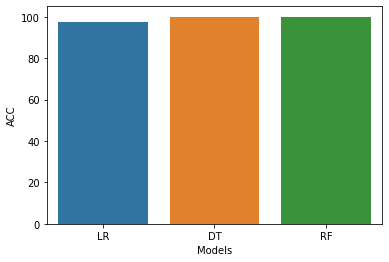

In [71]:
# plot barplots 
sns.barplot(df_new['Models'],df_new['ACC'])

# Results

The trained models achieved the following accuracy scores on the test set:

    Logistic Regression: 94.56%
    Decision Tree: 99.81%
    Random Forest: 99.99%

The results suggest that the Random Forest classifier performs the best among the three models.

# Saving the model

In [90]:
rf1 = RandomForestClassifier()
rf1.fit(X_res,y_res)

RandomForestClassifier()

In [91]:
import joblib

In [92]:
joblib.dump(rf1,"credit_card_model")

['credit_card_model']

In [93]:
model = joblib.load("credit_card_model")

In [94]:
pred = model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

In [96]:
if pred == 0:
    print("Normal Transcation")
else:
    print("Fraudulent Transcation")

Normal Transcation


# Conclusion

This project demonstrates how machine learning techniques can be applied to the problem of credit card fraud detection. The trained models can help financial institutions to detect fraudulent transactions in real-time, potentially saving millions of dollars in losses.